# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import scipy.stats
np.random.seed(42)
medical = pd.read_csv('insurance2.csv')

In [20]:
medical.shape

(1338, 8)

In [21]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [22]:
charges_mean  = np.mean(medical.charges)
charges_std = np.std(medical.charges,ddof=1)

print('The mean of the hospital medical charges is: ', charges_mean)
print('The standard deviation of the hospital medical charges is: ', charges_std)

The mean of the hospital medical charges is:  13270.422265141257
The standard deviation of the hospital medical charges is:  12110.011236694001


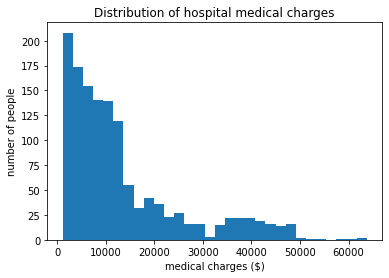

In [23]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('medical charges ($)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of hospital medical charges')

__A:__ The mean of the charges is 13270.42 dollars and standared deviation of the charges is 12110.01 dollars. 

The histogram reveals that medical charges are not normally distributed. So we can not ditectly apply z- or t-statistics. To be able to compute a confidence interval, I will use bootstrapping to obtain distribution of means. I will use that distribution to calculate the confidence interval. 

In [135]:
# Defining a function to bootstrap and collect means of each bootsrapped sample.
def bs_replicate(df,size):
    bs_means = np.empty(size)
    for i in range(size):
        bs_means[i] = np.random.choice(df, size = len(df)).mean()
    return bs_means    

In [136]:
bs_1000 = bs_replicate(medical.charges, 1000);

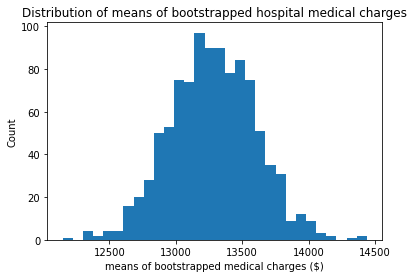

In [137]:
_ = plt.hist(bs_1000, bins=30)
_ = plt.xlabel('means of bootstrapped medical charges ($)')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of means of bootstrapped hospital medical charges')

In [138]:
lower_bound,upper_bound = np.percentile(bs_1000,[2.5,97.5])
print('The 95% confidence interval is: ',lower_bound1000,' ',upper_bound1000,' for 1000 samples')


The 95% confidence interval is:  12665.337503895533   13944.488293052897  for 1000 samples


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since sample distribution is not normal, I did bootstrapping and calculated the means of the bootsrapped samples. As you can see above the means are normally distributed. I will use this data to build confidence interval to answer whether actual average (population mean) has fallen below 12000 dollars.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ I will use on sided test since we are concerned about directionality (u<12000) and it is not within 95% CI.
Critical value for 95% CI for ddof 999 is ~1.96


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

**A** 

**Null hypotheisis:** There is no difference between the means of insured and uninsured people.

To use this formula we assume that two samples have similar variances. Also samples need to be normally distributed. 



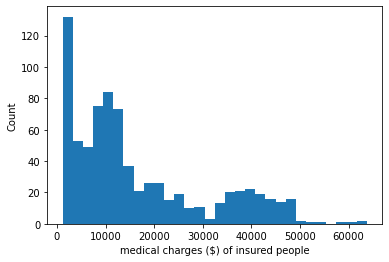

In [66]:
# Filter the people with insurance and plot the distribution. 

insured_charges = medical[medical['insuranceclaim']==1].charges
_ = plt.hist(insured_charges, bins=30)
_ = plt.xlabel('medical charges ($) of insured people')
_ = plt.ylabel('Count')


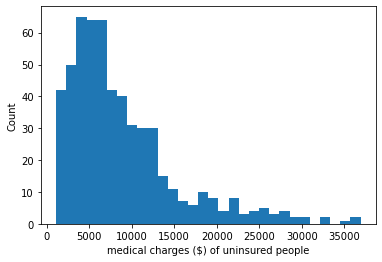

In [67]:
# Filter the people without insurance and plot the distribution. 

uninsured_charges = medical[medical['insuranceclaim']==0].charges
_ = plt.hist(uninsured_charges, bins=30)
_ = plt.xlabel('medical charges ($) of uninsured people')
_ = plt.ylabel('Count')


**Note:** Both samples are not distributed normally. I will repeat bootstrapping for both samples and keep sample sizes for means equeal. 

I plotted the distributions.

In [70]:
insured = bs_replicate(insured_charges, 1000);
uninsured = bs_replicate(uninsured_charges, 1000);

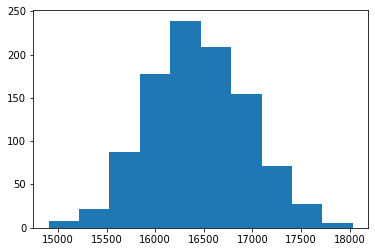

In [72]:
_=plt.hist(insured)

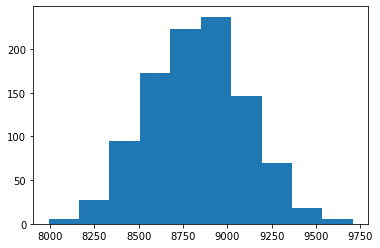

In [73]:
_=plt.hist(uninsured)

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

In [144]:
# Manual Calculation:
n0 = 1000
n1 = 1000
s0 = np.std(insured, ddof=1)
s1 = np.std(uninsured, ddof=1)
x0 = np.mean(insured)
x1 = np.mean(uninsured)
sp = np.sqrt((((n0-1)*(s0**2))+((n1-1)*(s1**2)))/(n0+n1-2))
t_stat_man = (x0-x1)/(sp*np.sqrt((1/n0)+(1/n1)))

print('The manually calculated t-statistic is: ',t_stat)

The manually calculated t-statistic is:  415.24250619487805


In [143]:
# Calculation using the scipy function:

t_stat_func, p_val = scipy.stats.ttest_ind(insured, uninsured)
print('The manually calculated t-statistic is: ',t_stat_func)

The manually calculated t-statistic is:  415.24250619487805


In [146]:
# Are they equal?

print('Are the t-statistics equal? ',t_stat_man==t_stat_func)

Are the t-statistics equal?  True


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test